In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading model

In [3]:
model=tf.keras.models.load_model('trained_model.keras')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [ ]:
### visualizing single image 

In [5]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/39.5 MB 7.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/39.5 MB 8.1 MB/s eta 0:00:05
   ------ --------------------------------- 6.3/39.5 MB 8.4 MB/s eta 0:00:04
   ------- -------------------------------- 7.9/39.5 MB 7.8 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/39.5 MB 7.7 MB/s eta 0:00:04
   ---------- ----------------------------- 10.7/39.5 MB 7.5 MB/s eta 0:00:04
   ------------ --------------------------- 12.1/39.5 MB 7.4 MB/s eta 0:00:04
   ------------- -------------------------- 13.4/39.5 MB 7.2 MB/s eta 0:00:04
   --------------- ------------------------ 14.9/39.5 MB 7.2 MB/s eta 0:00:04
   ---------------- ----------------------- 16.5/39.5 MB 7.2 MB/s eta 0:00:04
   ------------------ --------------------- 18.4/39.5 MB 7.3 MB/s eta 0:00:03


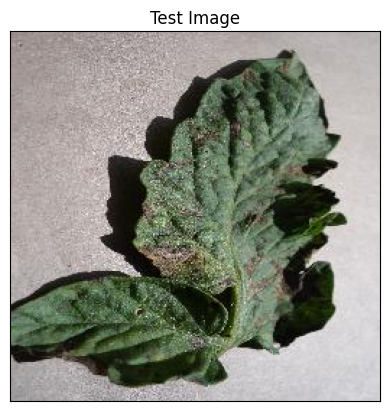

In [25]:
import cv2
image_path= "test/test/TomatoEarlyBlight5.JPG"
#reading image
img= cv2.imread(image_path)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

##TESTING MODEL

In [26]:
image= tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])  #convert single image to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [27]:
prediction= model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 878ms/step


(array([[9.28444488e-10, 2.75984547e-07, 2.23830246e-10, 1.42659082e-05,
         2.88298635e-10, 1.01209636e-07, 1.40127632e-10, 1.82378990e-09,
         6.95666025e-10, 1.85577465e-09, 1.35053879e-09, 2.01377026e-10,
         5.21015373e-08, 2.78147116e-10, 5.09427014e-11, 5.27277839e-11,
         5.59296609e-07, 9.19917795e-07, 4.22714059e-08, 2.99860083e-08,
         7.46971540e-10, 4.12466932e-08, 7.07103140e-08, 1.46338025e-10,
         8.50949533e-09, 1.24843984e-08, 1.68073744e-09, 4.84017271e-10,
         1.02217612e-08, 7.20312536e-01, 9.01473595e-06, 2.80300068e-08,
         2.31840371e-04, 1.13209906e-04, 5.74834161e-02, 1.91339811e-09,
         6.26576906e-08, 2.21833482e-01]], dtype=float32),
 (1, 38))

In [28]:
result_index= np.argmax(prediction)
result_index

29

In [29]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

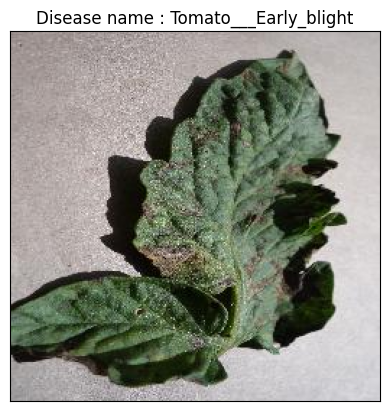

In [30]:
##displaying result
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease name : {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
model_prediction

'Tomato___Early_blight'